In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [276]:
df = pd.read_csv("/Users/apple/Learning python/1. Dataset/googleplaystore.csv")

In [277]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [278]:
df.describe(include=['O'])

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10840,10841,10841,10840,10841,10841,10840,10841,10833,10839
unique,9660,33,461,21,2,92,6,119,1377,2831,33
top,ROBLOX,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,1695,1579,10040,10041,8715,842,326,1459,2451


In [279]:
#Remove '$' sign on Price and convert data to float 
df.Price = df.Price.astype(str)
df['Price']=df['Price'].str.strip('$')
df.Price = df.Price.astype(float)

#Remove letter 'M', 'k' in Size, recode "Varies with device" to 0 and convert data to float
df.Size = df.Size.astype(str)
df['Size']=df['Size'].str.strip('M')
df['Size']=df['Size'].str.strip('k')
df.Size = df.Size.replace('Varies with device', 0)
df.Size = df.Size.astype(float)
df.loc[df['Size']>99, 'Size'] = df['Size']/1000

#Remove '+' in Installs and convert to int
import string
df.Installs = df.Installs.astype(str)
df['Installs']=df['Installs'].str.strip('+')
df['Installs'] = df['Installs'].str.replace('[{}]'.format(string.punctuation), '')
df.Installs = df.Installs.astype(int)
df['Installs']=df['Installs']/1000

#Remove duplicates
df=df.drop_duplicates(['App'], keep='last')

In [280]:
df.sort_values(by="Installs", ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76.000,1000000.000,Free,0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
4096,Gmail,COMMUNICATION,4.3,4604324,0.000,1000000.000,Free,0.00,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,0.000,1000000.000,Free,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device
4153,Hangouts,COMMUNICATION,4.0,3419464,0.000,1000000.000,Free,0.00,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
4144,Google+,SOCIAL,4.2,4828372,0.000,1000000.000,Free,0.00,Teen,Social,"July 26, 2018",Varies with device,Varies with device
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,0.000,1000000.000,Free,0.00,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
4170,Google Drive,PRODUCTIVITY,4.4,2728941,0.000,1000000.000,Free,0.00,Everyone,Productivity,"July 30, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.000,1000000.000,Free,0.00,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.000,1000000.000,Free,0.00,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,0.000,1000000.000,Free,0.00,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device


In [281]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8197.000000,9.660000e+03,9660.000000,9660.000000,9660.000000
mean,4.172941,2.166288e+05,17.906853,7793.440727,1.097117
std,0.536823,1.830645e+06,21.427253,53767.189441,16.850750
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,2.500000e+01,3.000000,1.000000,0.000000
50%,4.300000,9.680000e+02,9.200000,100.000000,0.000000
75%,4.500000,2.939400e+04,26.000000,1000.000000,0.000000
max,5.000000,7.812821e+07,99.000000,1000000.000000,400.000000


In [282]:
df.describe(include=['O'])

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9660,9659,9659,9660,9659,9660,9652,9658
unique,9660,33,2,6,118,1377,2818,33
top,Online TV CZ/SK PRO,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1906,8905,7904,828,252,1054,2206


In [283]:
#Number of apps by category
df.groupby(['Category']).count()['App'].sort_values(ascending=False)

Category
FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
ENTERTAINMENT            79
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [284]:
#Which type has most installs
df.groupby(['Type']).mean()['Installs'].sort_values(ascending = False)

Type
Free    8447.756726
Paid      76.079285
Name: Installs, dtype: float64

In [285]:
#Type
app_type = df.groupby('Type').count()['App']

In [286]:
#App content
app_content = df.groupby('Content Rating')['App'].count().sort_values(ascending = False)
app_content

Content Rating
Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: App, dtype: int64

In [287]:
#Group price range:
df['Price range'] = df['Price']
df.loc[df.Price==0,'Price range']= 'Free'
df.loc[(df.Price>0)&(df.Price<=1.49), 'Price range']= '1'
df.loc[(df.Price>1.49)&(df.Price<=2.99), 'Price range']='2'
df.loc[(df.Price>2.99)&(df.Price<=4.99), 'Price range']='3'
df.loc[df.Price>4.99, 'Price range']='4'
df.groupby('Price range').count()['App']

Price range
1        198
2        240
3        158
4        158
Free    8906
Name: App, dtype: int64

In [288]:
#Price range of paid apps
paid_app = df[df['Type']== 'Paid']
paid_app['Price'].describe()

count    754.000000
mean      14.055902
std       58.821000
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [289]:
#Group Rating level:
df['Rating level'] = df['Rating']
df.loc[df.Rating==0,'Rating level']= 'NA'
df.loc[(df.Rating>0)&(df.Rating<=3), 'Rating level']= 'bad'
df.loc[(df.Rating>3)&(df.Rating<=4), 'Rating level']='average'
df.loc[(df.Rating>4)&(df.Rating<=4.5), 'Rating level']='good'
df.loc[df.Rating>4.5, 'Rating level']='excellent'
df.groupby('Rating level').count()['App']

Rating level
average      2063
bad           360
excellent    1698
good         4076
Name: App, dtype: int64

In [290]:
#App category by price
df.groupby('Category').mean()['Price'].sort_values(ascending=False)

Category
FINANCE                8.408203
LIFESTYLE              6.398022
MEDICAL                2.481591
EVENTS                 1.718594
FAMILY                 1.264344
PRODUCTIVITY           0.670936
BOOKS_AND_REFERENCE    0.539505
PHOTOGRAPHY            0.420925
BUSINESS               0.418353
WEATHER                0.410380
PERSONALIZATION        0.400213
TOOLS                  0.322376
GAME                   0.307030
SPORTS                 0.305810
COMMUNICATION          0.263101
TRAVEL_AND_LOCAL       0.228082
HEALTH_AND_FITNESS     0.224216
MAPS_AND_NAVIGATION    0.205725
PARENTING              0.159667
AUTO_AND_VEHICLES      0.158471
DATING                 0.120294
ENTERTAINMENT          0.101013
ART_AND_DESIGN         0.097869
EDUCATION              0.078235
FOOD_AND_DRINK         0.075714
SOCIAL                 0.066820
VIDEO_PLAYERS          0.064172
SHOPPING               0.027129
NEWS_AND_MAGAZINES     0.015669
LIBRARIES_AND_DEMO     0.011786
COMICS                 0.000000

In [291]:
#Average installs by category, content rating and type:
for x in ('Category','Content Rating','Type','Price range','Rating level'):
    print(df.groupby([x]).mean()['Installs'].sort_values(ascending = False))
    

Category
COMMUNICATION          34934.418516
VIDEO_PLAYERS          24030.691534
SOCIAL                 22961.790385
PHOTOGRAPHY            16577.037918
PRODUCTIVITY           15476.180131
TRAVEL_AND_LOCAL       13218.662767
GAME                   11768.816863
TOOLS                   9774.151888
NEWS_AND_MAGAZINES      9327.628976
ENTERTAINMENT           8970.379747
BOOKS_AND_REFERENCE     7504.367459
SHOPPING                6932.419728
FAMILY                  4654.062175
WEATHER                 4570.892658
PERSONALIZATION         4075.783995
SPORTS                  3964.753817
HEALTH_AND_FITNESS      3951.297951
MAPS_AND_NAVIGATION     3841.846489
FOOD_AND_DRINK          1891.060277
ART_AND_DESIGN          1856.362295
EDUCATION               1734.813725
BUSINESS                1651.944785
LIFESTYLE               1365.375444
HOUSE_AND_HOME          1331.540562
FINANCE                 1319.851403
DATING                   828.971218
COMICS                   803.234821
LIBRARIES_AND_DEMO 

In [292]:
#Which category has most excellent apps:
pd.crosstab(df['Category'],df['Rating level'],
            margins=True, margins_name="Total",normalize='index').sort_values(by=['excellent'],ascending=False)

Rating level,average,bad,excellent,good
Category,,,,
EVENTS,0.155556,0.022222,0.422222,0.400000
PARENTING,0.220000,0.020000,0.380000,0.380000
BOOKS_AND_REFERENCE,0.189349,0.005917,0.378698,0.426036
HEALTH_AND_FITNESS,0.152263,0.086420,0.366255,0.395062
ART_AND_DESIGN,0.152542,0.000000,0.355932,0.491525
AUTO_AND_VEHICLES,0.328767,0.041096,0.287671,0.342466
MEDICAL,0.233677,0.079038,0.281787,0.405498
LIFESTYLE,0.289037,0.096346,0.269103,0.345515
EDUCATION,0.158416,0.000000,0.267327,0.574257


In [293]:
#Which category has most free apps 
b = pd.crosstab(df['Category'],df['Price range'],normalize='index')
b.sort_values(by=['Free'],ascending=False)

Price range,1,2,3,4,Free
Category,,,,,
HOUSE_AND_HOME,0.000000,0.000000,0.000000,0.000000,1.000000
BEAUTY,0.000000,0.000000,0.000000,0.000000,1.000000
COMICS,0.000000,0.000000,0.000000,0.000000,1.000000
NEWS_AND_MAGAZINES,0.003937,0.003937,0.000000,0.000000,0.992126
SHOPPING,0.000000,0.009901,0.000000,0.000000,0.990099
LIBRARIES_AND_DEMO,0.011905,0.000000,0.000000,0.000000,0.988095
SOCIAL,0.008368,0.000000,0.000000,0.004184,0.987448
EVENTS,0.000000,0.000000,0.000000,0.015625,0.984375
FOOD_AND_DRINK,0.000000,0.000000,0.017857,0.000000,0.982143


In [294]:
### Data visualization

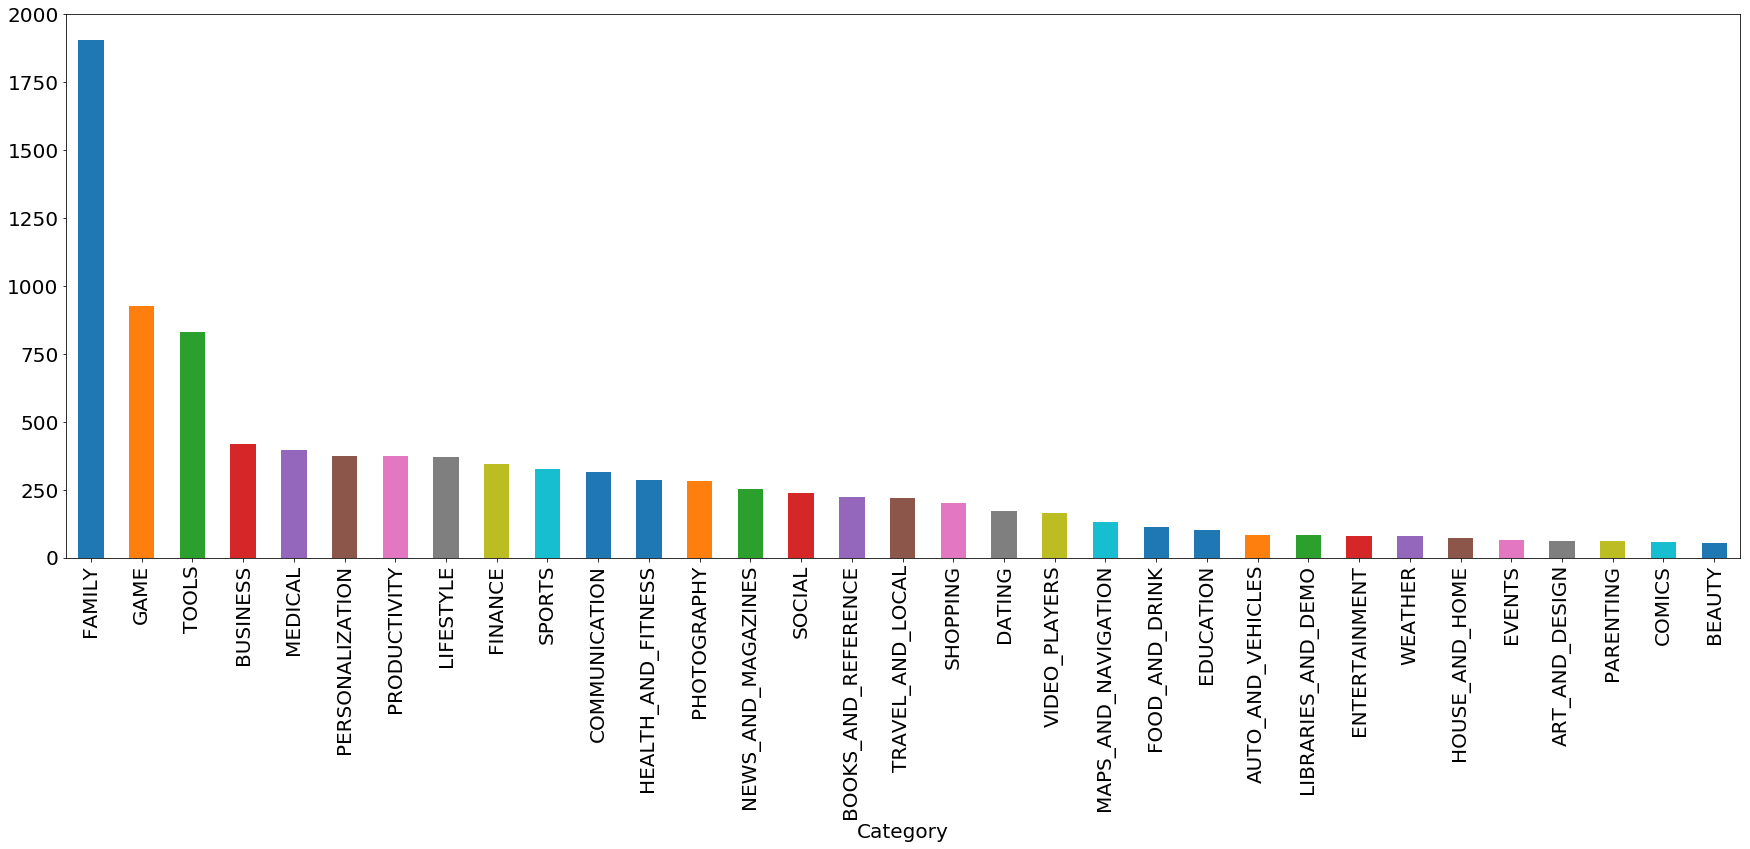

In [295]:
#Number of apps by category
plt.rcParams.update({'font.size': 20})
df.groupby(['Category']).count()['App'].sort_values(ascending=False).plot(kind='bar',figsize=(30,10))

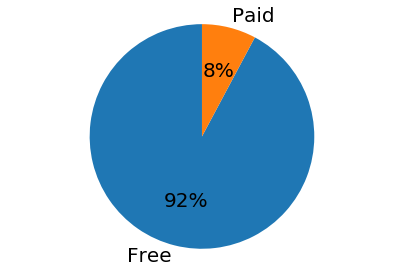

In [296]:
#Number of apps by type
fig2, ax2 = plt.subplots()
ax2.pie(app_type, labels=app_type.index[0:2],autopct='%1.0f%%', shadow=False, startangle=90)
ax2.axis('equal') 
plt.tight_layout()

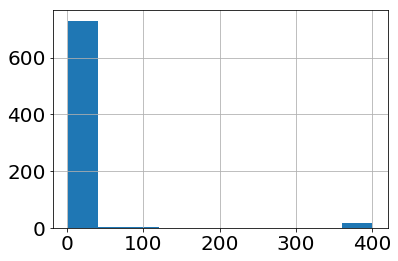

In [297]:
#Apps price range
paid_app['Price'].hist()

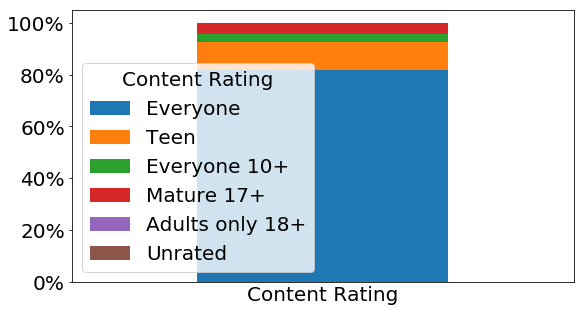

In [298]:
#Number of apps by content
df.assign(
 dummy = 1   
).groupby(['dummy','Content Rating']).size().groupby(level=0).apply(
    lambda x: 100* x / x.sum()
).unstack().loc[:,['Everyone','Teen','Everyone 10+','Mature 17+','Adults only 18+','Unrated']].plot(kind='bar',
stacked=True,legend=True, figsize=(9,5))

plt.xlabel('Content Rating')
plt.xticks([])

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

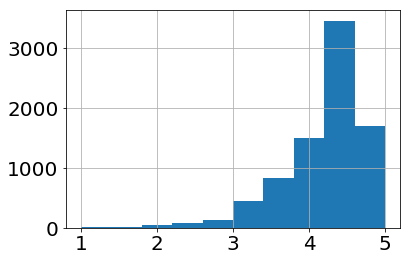

In [299]:
#App rating
df['Rating'].hist()

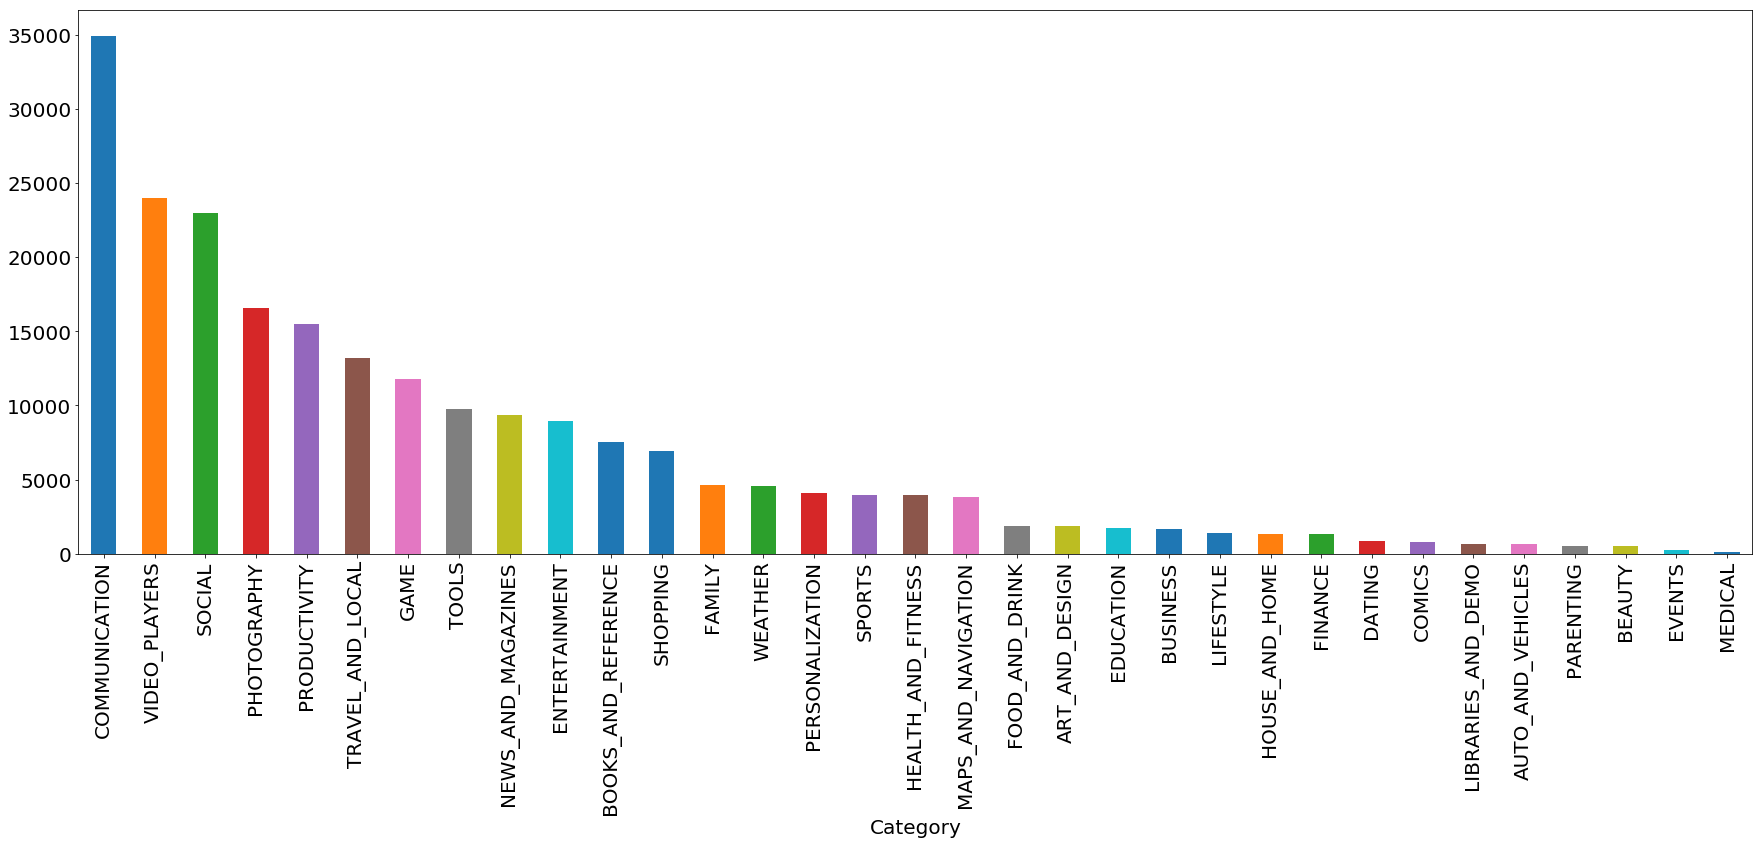

In [300]:
#Average installs by category
df.groupby(['Category']).mean()['Installs'].sort_values(ascending=False).plot(kind='bar',figsize=(30,10))

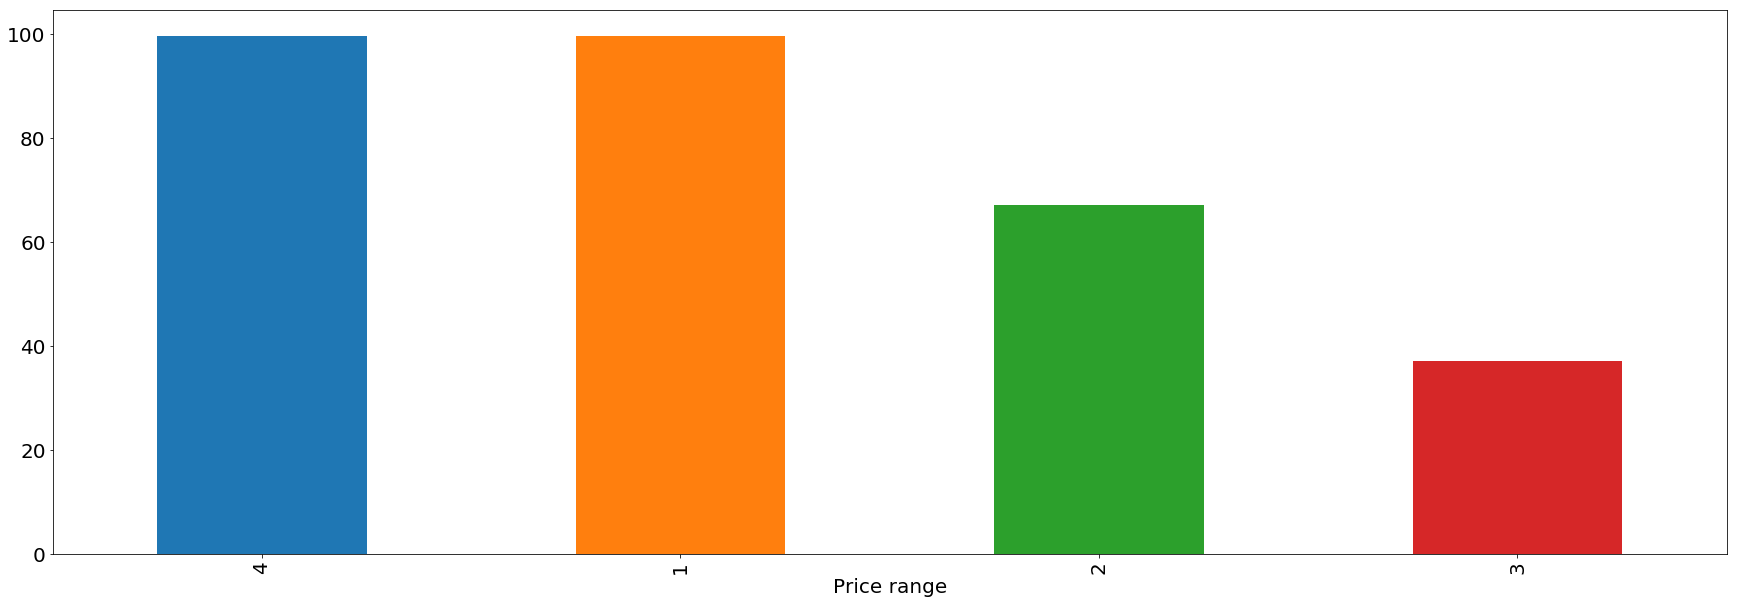

In [301]:
#Average installs by price range
paid_app.groupby(['Price range']).mean()['Installs'].sort_values(ascending=False).plot(kind='bar',figsize=(30,10))

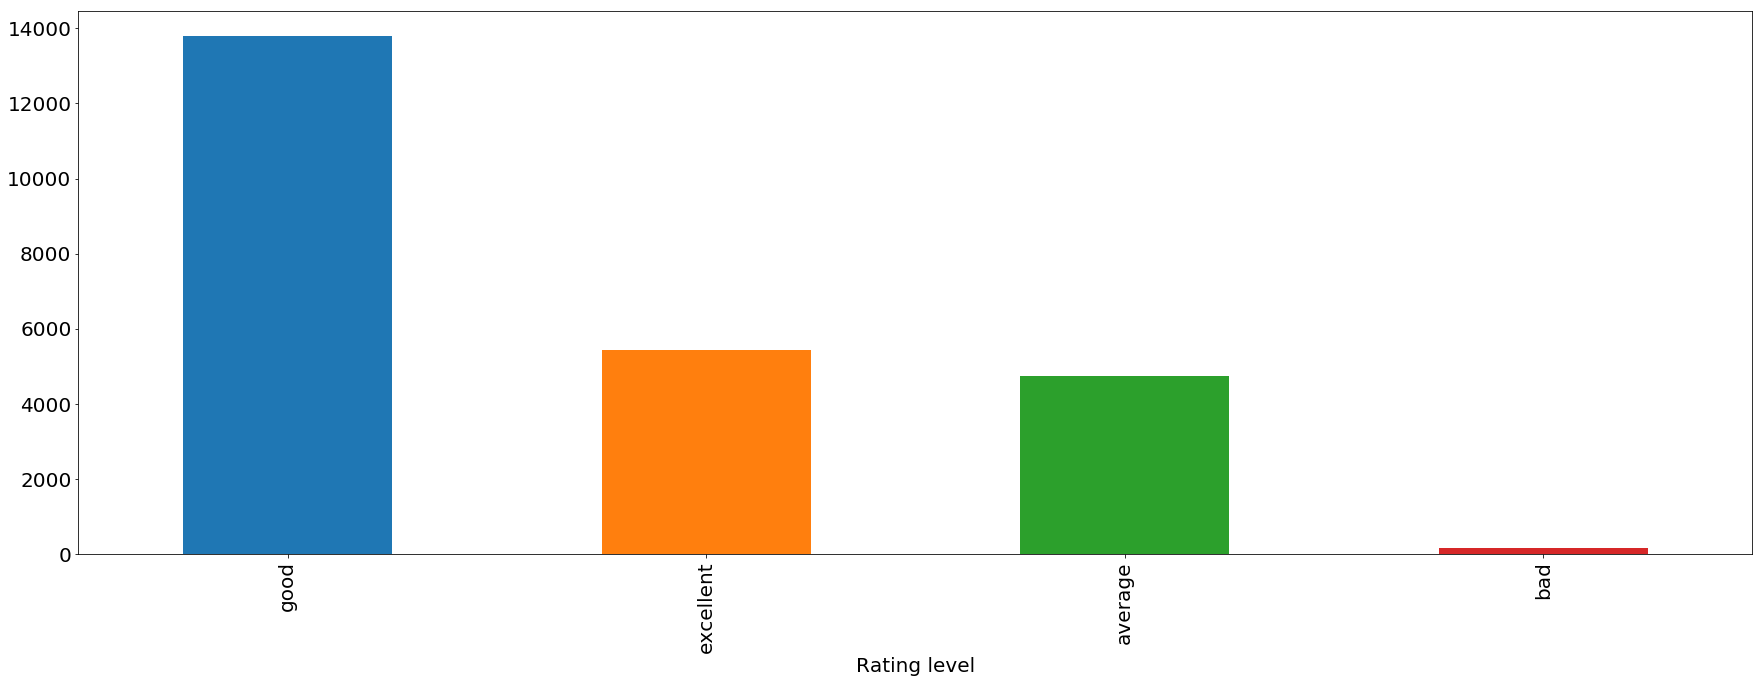

In [302]:
#Average installs by rating
df.groupby(['Rating level']).mean()['Installs'].sort_values(ascending=False).plot(kind='bar',figsize=(30,10))